# Lending Club Loan Data


data source: https://www.kaggle.com/wendykan/lending-club-loan-data

### 1.) Data Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import warnings

warnings.filterwarnings('ignore')

startall = time.time()

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.2f}'.format # to set the displayed data as in the two decimal format

In [3]:
start = time.time()

df = pd.read_csv("F:\Billie\Data Science\loan.csv").sample(frac= 0.4, random_state = 1)

stop = time.time()
duration = stop-start
print('It took {:.2f} seconds to read the entire csv file.'.format(duration))

df.head()

It took 122.08 seconds to read the entire csv file.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1832766,nan,nan,35000,35000,34950.00,36 months,12.12,1164.51,B,B3,Protestant Church,5 years,RENT,165000.00,Verified,Sep-2012,Fully Paid,n,nan,Borrower added on 08/31/12 > This loan is pa...,credit_card,Debt Be Gone,100xx,NY,9.01,0.00,Jan-1983,0.00,51.00,nan,2.00,0.00,744,16.50,27.00,f,0.00,0.00,41922.27,41862.38,35000.00,6922.27,0.00,0.00,0.00,Sep-2015,1167.89,NaN,Dec-2018,0.00,nan,1,Individual,nan,nan,NaN,0.00,0.00,41223.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4500.00,nan,nan,nan,0.00,20612.00,3756.00,16.50,0.00,0.00,360.00,238.00,30.00,30.00,2.00,30.00,51.00,12.00,51.00,0.00,1.00,1.00,1.00,8.00,14.00,1.00,10.00,1.00,2.00,0.00,0.00,0.00,0.00,96.00,0.00,0.00,0.00,49161.00,41223.00,4500.00,0.00,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1380734,nan,nan,15000,15000,15000.00,60 months,13.49,345.08,C,C2,owner,8 years,MORTGAGE,150000.00,Source Verified,Mar-2017,Current,n,nan,NaN,home_improvement,Home improvement,117xx,NY,4.40,0.00,Oct-1991,0.00,nan,68.00,18.00,1.00,14440,34.10,28.00,w,10397.86,10397.86,7925.60,7925.60,4602.14,3323.46,0.00,0.00,0.00,Feb-2019,345.08,Mar-2019,Feb-2019,0.00,nan,1,Individual,nan,nan,NaN,0.00,0.00,14440.00,0.00,0.00,0.00,0.00,30.00,0.00,nan,1.00,1.00,2114.00,34.00,42400.00,0.00,0.00,7.00,1.00,849.00,8608.00,37.60,0.00,0.00,50.00,304.00,10.00,10.00,4.00,29.00,nan,4.00,nan,0.00,4.00,14.00,5.00,7.00,2.00,18.00,22.00,14.00,18.00,0.00,0.00,0.00,1.00,100.00,0.00,1.00,0.00,42400.00,14440.00,13800.00,0.00,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
560750,nan,nan,5000,50

### 2.) Exploratory Data Analysis

In [4]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.00,0.00,904267.00,904267.00,904267.00,904267.00,904267.00,904264.00,0.00,903552.00,904255.00,904255.00,440834.00,143602.00,904255.00,904255.00,904267.00,903549.00,904255.00,904267.00,904267.00,904267.00,904267.00,904267.00,904267.00,904267.00,904267.00,904267.00,904267.00,904203.00,232176.00,904267.00,48192.00,48191.00,904255.00,876279.00,876279.00,557727.00,557727.00,557727.00,557727.00,540320.00,557727.00,476783.00,557727.00,557727.00,557727.00,557632.00,876279.00,557727.00,557727.00,557727.00,884351.00,876250.00,874521.00,874065.00,904203.00,904255.00,848826.00,876279.00,876279.00,876279.00,884351.00,875149.00,207710.00,786612.00,296153.00,876279.00,876279.00,876279.00,880960.00,876279.00,876279.00,876279.00,876278.00,876279.00,880960.00,842860.00,876279.00,876279.00,876279.00,876214.00,874335.00,903750.00,904224.00,876279.00,884351.00,884351.00,876279.00,43043.00,43044.00,43044.00,43044.00,42349.00,43044.00,43044.00,43044.00,43044.00,14244.00,4214.00,4214.00,4214.00,4214.00,3332.00,4214.00,4214.00,13233.00,13233.00,13233.00
mean,nan,nan,15072.31,15067.11,15049.06,13.09,446.39,78053.92,nan,18.83,0.31,0.58,34.59,72.22,11.62,0.20,16700.41,50.35,24.17,4461.14,4460.12,11831.38,11813.62,9303.71,2388.77,1.46,137.44,22.80,3364.66,0.02,44.20,1.00,124063.87,19.28,0.00,240.19,142857.59,0.94,2.78,0.68,1.57,21.19,35555.99,69.14,1.29,2.75,5814.88,57.04,34638.42,1.02,1.48,2.04,4.52,13575.77,11411.11,57.90,0.01,11.82,125.81,181.64,14.02,8.28,1.56,24.89,39.31,7.02,35.81,0.50,3.68,5.63,4.78,7.73,8.41,8.25,14.01,5.58,11.63,0.00,0.00,0.08,2.08,94.12,42.42,0.13,0.05,178700.37,51100.82,23227.67,43785.09,33828.17,0.64,1.55,11.50,58.00,3.01,12.56,0.05,0.08,36.95,3.00,155.72,3.00,13.65,453.89,11602.46,196.19,5033.02,47.73,13.06
std,nan,nan,9204.21,9202.55,9206.36,4.83,267.38,77229.19,nan,14.34,0.86,0.89,21.93,26.46,5.64,0.57,23451.59,24.72,11.98,7572.32,7571.34,9890.20,9885.51,8307.35,2666.57,11.54,729.99,127.61,5978.77,0.15,21.52,0.00,80750.97,7.83,0.07,11447.51,161680.31,1.14,3.00,0.93,1.58,26.00,44139.04,23.81,1.51,2.60,5722.45,20.89,38114.01,1.49,2.66,2.38,3.17,16526.03,16600.03,28.60,0.10,707.73,53.45,97.09,17.57,9.19,1.91,32.41,22.66,5.96,22.33,1.35,2.33,3.38,3.04,4.70,7.35,4.69,8.04,3.30,5.64,0.03,0.06,0

In [85]:
df.shape

(904267, 145)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904267 entries, 1832766 to 1724503
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 1007.3+ MB


In [6]:
# Analyzing the missing value in each columns
df_null = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': round(100*df.isnull().sum()/len(df),2)})
df_null[df_null['Count'] != 0] 

,Count,Percent
id,904267,100.00
member_id,904267,100.00
emp_title,66725,7.38
emp_length,58685,6.49
annual_inc,3,0.00
url,904267,100.00
desc,854205,94.46
title,9410,1.04
zip_code,1,0.00
dti,715,0.08


[Text(0, 0, 'id'),
 Text(0, 0, 'url'),
 Text(0, 0, 'member_id'),
 Text(0, 0, 'orig_projected_additional_accrued_interest'),
 Text(0, 0, 'hardship_dpd'),
 Text(0, 0, 'hardship_status'),
 Text(0, 0, 'deferral_term'),
 Text(0, 0, 'hardship_amount'),
 Text(0, 0, 'hardship_start_date'),
 Text(0, 0, 'hardship_end_date'),
 Text(0, 0, 'payment_plan_start_date'),
 Text(0, 0, 'hardship_length'),
 Text(0, 0, 'hardship_loan_status'),
 Text(0, 0, 'hardship_reason'),
 Text(0, 0, 'hardship_payoff_balance_amount'),
 Text(0, 0, 'hardship_last_payment_amount'),
 Text(0, 0, 'hardship_type'),
 Text(0, 0, 'debt_settlement_flag_date'),
 Text(0, 0, 'settlement_status'),
 Text(0, 0, 'settlement_date'),
 Text(0, 0, 'settlement_amount'),
 Text(0, 0, 'settlement_percentage'),
 Text(0, 0, 'settlement_term'),
 Text(0, 0, 'sec_app_mths_since_last_major_derog'),
 Text(0, 0, 'sec_app_revol_util'),
 Text(0, 0, 'sec_app_mort_acc'),
 Text(0, 0, 'sec_app_chargeoff_within_12_mths'),
 Text(0, 0, 'sec_app_earliest_cr_line')

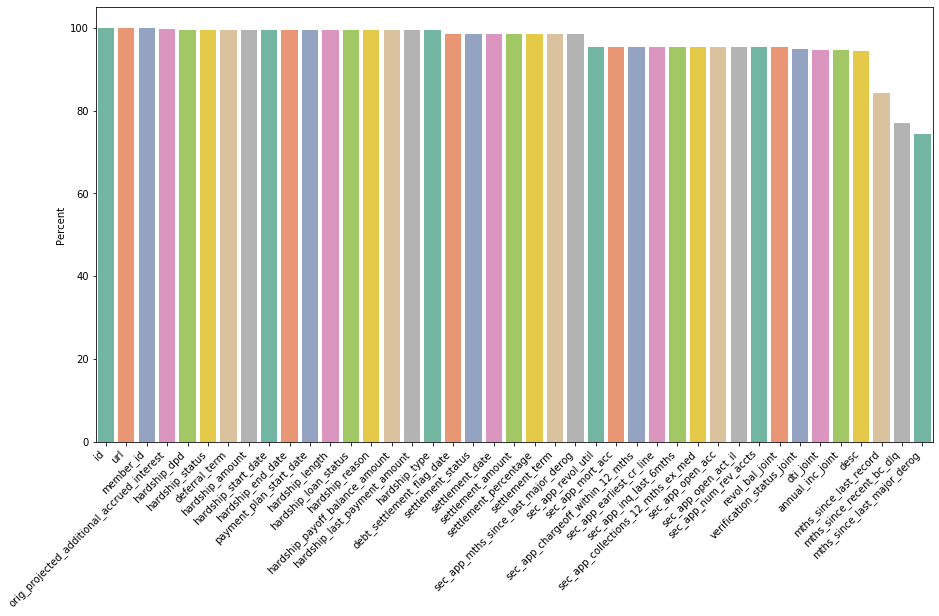

In [7]:
# Visualize the percentage of missing values in columns that have more than 70% missing values
df_null_70up = df_null[df_null['Percent'] >= 70]
df_null_70up = df_null_70up.sort_values(
    by=['Percent'], 
    ascending=False
)

plt.figure(figsize=(15,8))
barchart = sns.barplot(
    df_null_70up.index, 
    df_null_70up['Percent'],
    palette='Set2'
)

barchart.set_xticklabels(barchart.get_xticklabels(), rotation=45, horizontalalignment='right')

Columns with total misisng values more than 70% would be unnecessary for further analysis and might eventually lead to a inaccurate result in the final model

In [8]:
# Remove columns which missing values > 70%
df_1 = df.dropna(axis=1, thresh=int(0.70*len(df)))
df_1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
1832766,35000,35000,34950.00,36 months,12.12,1164.51,B,B3,Protestant Church,5 years,RENT,165000.00,Verified,Sep-2012,Fully Paid,n,credit_card,Debt Be Gone,100xx,NY,9.01,0.00,Jan-1983,0.00,2.00,0.00,744,16.50,27.00,f,0.00,0.00,41922.27,41862.38,35000.00,6922.27,0.00,0.00,0.00,Sep-2015,1167.89,Dec-2018,0.00,1,Individual,0.00,0.00,41223.00,4500.00,0.00,20612.00,3756.00,16.50,0.00,0.00,360.00,238.00,30.00,30.00,2.00,30.00,12.00,0.00,1.00,1.00,1.00,8.00,14.00,1.00,10.00,1.00,2.00,0.00,0.00,0.00,0.00,96.00,0.00,0.00,0.00,49161.00,41223.00,4500.00,0.00,N,Cash,N
1380734,15000,15000,15000.00,60 months,13.49,345.08,C,C2,owner,8 years,MORTGAGE,150000.00,Source Verified,Mar-2017,Current,n,home_improvement,Home improvement,117xx,NY,4.40,0.00,Oct-1991,0.00,18.00,1.00,14440,34.10,28.00,w,10397.86,10397.86,7925.60,7925.60,4602.14,3323.46,0.00,0.00,0.00,Feb-2019,345.08,Feb-2019,0.00,1,Individual,0.00,0.00,14440.00,42400.00,1.00,849.00,8608.00,37.60,0.00,0.00,50.00,304.00,10.00,10.00,4.00,29.00,4.00,0.00,4.00,14.00,5.00,7.00,2.00,18.00,22.00,14.00,18.00,0.00,0.00,0.00,1.00,100.00,0.00,1.00,0.00,42400.00,14440.00,13800.00,0.00,N,Cash,N
560750,5000,5000,5000.00,36 months,8.99,158.98,B,B1,Musician,10+ years,RENT,29000.00,Not Verified,Jul-2016,Fully Paid,n,debt_consolidation,Debt consolidation,372xx,TN,8.61,0.00,May-1989,0.00,5.00,1.00,2543,32.60,28.00,f,0.00,0.00,5426.52,5426.52,5000.00,426.52,0.00,0.00,0.00,Sep-2017,3523.75,Feb-2019,0.00,1,Individual,0.00,0.00,7050.00,7800.00,2.00,1410.00,2757.00,48.00,0.00,0.00,119.00,326.00,14.00,14.00,1.00,32.00,0.00,0.00,2.00,2.00,2.00,14.00,6.00,4.00,21.00,2.00,5.00,0.00,0.00,0.00,0.00,100.00,0.00,1.00,0.00,14760.00,7050.00,5300.00,6960.00,N,Cash,N
2156089,33600,33600,33600.00,36 months,10.91,1098.59,B,B4,Dental Assistant,3 years,MORTGAGE,90000.00,Source Verified,Dec-2017,Current,n,credit_card,Credit card refinancing,263xx,WV,18.17,0.00,Feb-2008,1.00,11.00,0.00,7861,24.00,12.00,w,21815.82,21815.82,15367.83,15367.83,11784.18,3583.65,0.00,0.00,0.00,Feb-2019,1098.59,Feb-2019,0.00,1,Individual,0.00,666.00,92316.00,32800.00,4.00,8392.00,9756.00,27.70,0.00,0.00,118.00,58.00,4.00,4.00,0.00,7.00,4.00,0.00,3.00,7.00,3.00,3.00,4.00,8.00,8.00,7.00,11.00,0.00,0.00,0.00,3.00,100.00,33.30,0.00,0.00,122340.00,92316.00,13500.00,89540.00,N,Cash,N
616767,23000,23000,23000.00,36 months,7.89,719.57,A,A5,Mail Handler,10+ years,MORTGAGE,75000.00,Verified,Jun-2016,Fully Paid,n,debt_consolidation,Debt consolidation,496xx,MI,13.78,0.00,Feb-1992,0.00,10.00,1.00,13773,44.90,36.00,w,0.00,0.00,23015.79,23015.79,23000.00,15.79,0.00,0.00,0.00,Jun-2016,23025.87,May-2016,0.00,1,Individual,0.00,0.00,125287.00,30700.00,4.00,15661.00,4135.00,64.00,0.00,0.00,132.00,291.00,26.00,8.00,7.00,64.00,8.00,0.00,1.00,3.00,1.0

In [9]:
print(
    'The number of columns has reduced from {} to {} columns by removing columns with 70% missing values'.
    format(len(df.columns), len(df_1.columns))
)

The number of columns has reduced from 145 to 87 columns by removing columns with 70% missing values


### 3.) Data Visualization 

**3.1. Loan Status**

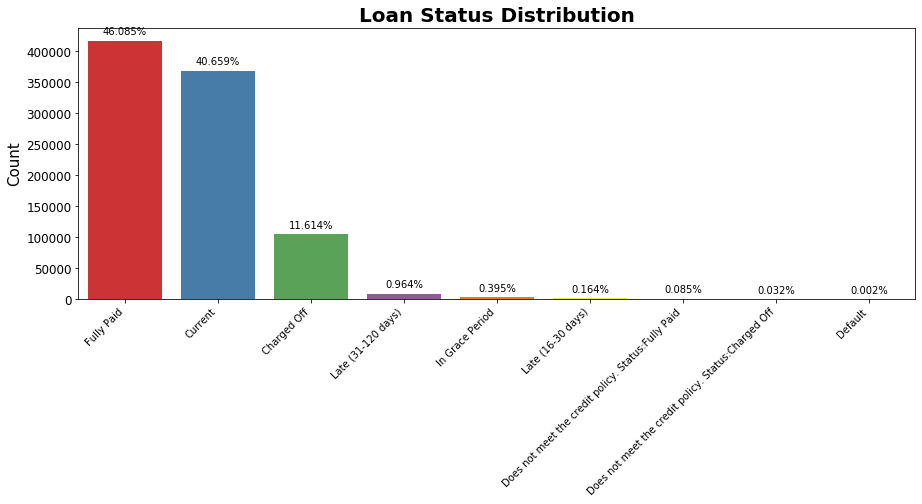

In [10]:
plt.figure(figsize = (15,5))
plot1 = sns.barplot(df.loan_status.value_counts().index, df.loan_status.value_counts(), palette = 'Set1')
plt.xticks(rotation = 45, horizontalalignment='right')
plt.yticks(fontsize = 12)
plt.title("Loan Status Distribution", fontsize = 20, weight='bold')
plt.ylabel("Count", fontsize = 15)

total = len(df_1)
sizes = []
for p in plot1.patches:
    height = p.get_height()
    sizes.append(height)
    plot1.text(p.get_x() + p.get_width()/2.,
            height + 10000,
            '{:1.3f}%'.format(height/total*100),
            ha = "center", 
            fontsize = 10) 

Based on the existing loan_status, I will choose only rows which loan status = ('fully paid', 'default', 'charged off') in order to easily categorize them into *fully paid* or *default* loans.

In [11]:
selected_loan_status = ['Fully Paid', 'Charged Off', 'Default']
df_2 = df_1[df_1.loan_status.isin(selected_loan_status)]
df_2.loan_status = df_2.loan_status.replace({'Fully Paid' : 'Fully Paid'})
df_2.loan_status = df_2.loan_status.replace({'Charged Off' : 'Default'})
df_2.loan_status = df_2.loan_status.replace({'Default' : 'Default'})


In [12]:
print(
    'The number of rows has been reduced from {:,.0f} to {:,.0f} by filtering the data with the correlated loan status'.
    format(len(df_1), len(df_2))     
)

The number of rows has been reduced from 904,267 to 521,763 by filtering the data with the correlated loan status


**3.2. Loan's Term**

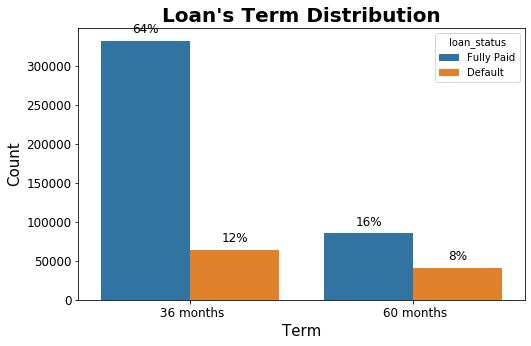

In [13]:
plt.figure(figsize=(8, 5))
plot2 = sns.countplot(df_2.term, hue = df_2.loan_status)
plt.title("Loan's Term Distribution", fontsize = 20, weight='bold')
plt.ylabel("Count", fontsize = 15)
plt.xlabel("Term", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

total = len(df_2)
sizes = []
for p in plot2.patches:
    height = p.get_height()
    sizes.append(height)
    plot2.text(p.get_x() + p.get_width()/2.,
            height + 10000,
            '{:1.0f}%'.format(height/total*100),
            ha = "center", 
            fontsize = 12) 

From the graph above, it can be noted that more borrowers in Lending Club are using 36 months loan's term. It is also important to see that while fewer people using 60 months loan's term, but half of them is categorised as *default loan* while only 12% of the total borrowers who use 36 months loan's term is considered as *default*.

**3.3. Loan Amount**

(array([0.e+00, 1.e-05, 2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05,
        8.e-05]),
 <a list of 9 Text yticklabel objects>)

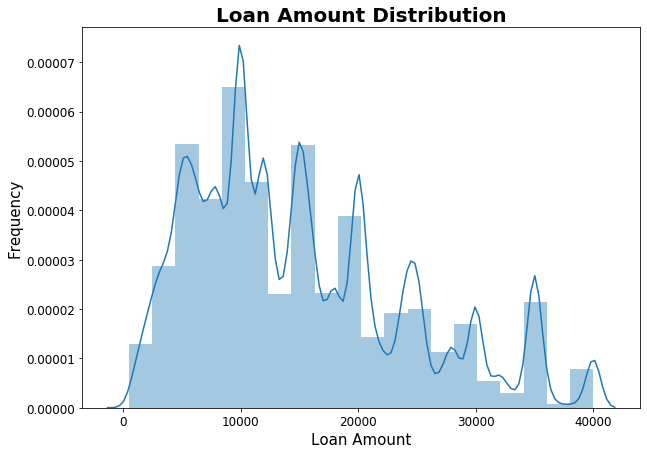

In [14]:
plt.figure(figsize = (10,7))
sns.distplot(df.loan_amnt, bins=20)
plt.title('Loan Amount Distribution', fontsize = 20, weight='bold')
plt.xlabel('Loan Amount', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

**3.4. Interest Rate**

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 <a list of 6 Text yticklabel objects>)

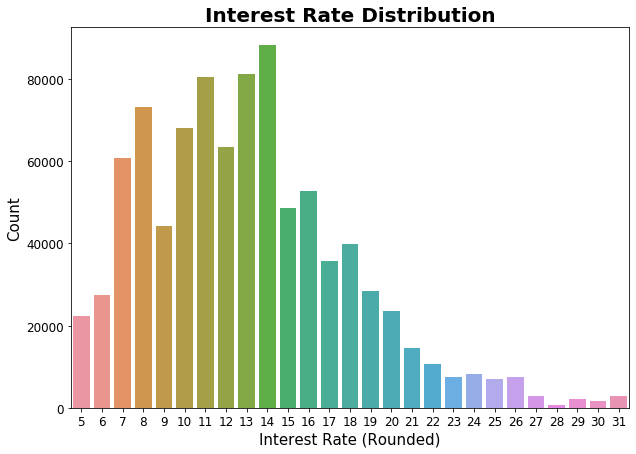

In [15]:
plt.figure(figsize = (10,7))
sns.countplot(round(df.int_rate, 0).astype(int))
plt.title('Interest Rate Distribution', fontsize = 20, weight='bold')
plt.xlabel('Interest Rate (Rounded)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

It can be inferred that many loan done in Lending Club has interest rate lies between 7-18 %

**3.5. Grade**

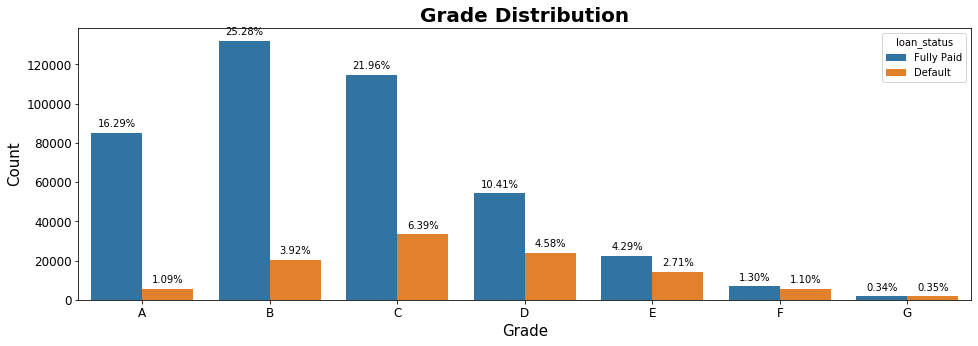

In [16]:
plt.figure(figsize = (16,5))
plot3 = sns.countplot(df_2.sort_values(by='grade').grade, hue = df_2.loan_status)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Grade Distribution", fontsize = 20, weight='bold')
plt.xlabel("Grade", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

total = len(df_2)
sizes = []
for p in plot3.patches:
    height = p.get_height()
    sizes.append(height)
    plot3.text(p.get_x() + p.get_width()/2.,
            height + 3000,
            '{:1.2f}%'.format(height/total*100),
            ha = "center", 
            fontsize = 10) 

From the chart above we see that as the grade is degrading, more loans are categorised as *default* rather than *fully paid*, which is reasonable because a lower grade means that the risk of defaulting is also increasing

**3.6. Loan Purpose**

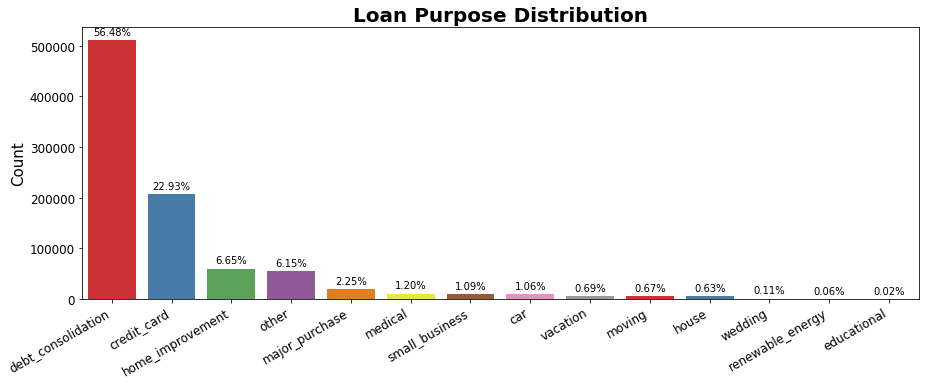

In [17]:
plt.figure(figsize = (15,5))
plot4 = sns.barplot(df.purpose.value_counts().index, df.purpose.value_counts(), palette = 'Set1')
plt.xticks(rotation = 30, fontsize = 12, horizontalalignment='right')
plt.yticks(fontsize = 12)
plt.title("Loan Purpose Distribution", fontsize = 20, weight='bold')
plt.ylabel("Count", fontsize = 15)

total = len(df_1)
sizes = []
for p in plot4.patches:
    height = p.get_height()
    sizes.append(height)
    plot4.text(p.get_x() + p.get_width()/2.,
            height + 10000,
            '{:1.2f}%'.format(height/total*100),
            ha = "center", 
            fontsize = 10) 

It can be inferred that almost 80% of borrower in Lending Club has the purpose to re-pay their previous debt

**3.7. Loan Status Distribution based by Loan Amount and Interest Rate**

Text(0.5, 1.0, 'Loan Status by Loan Amount')

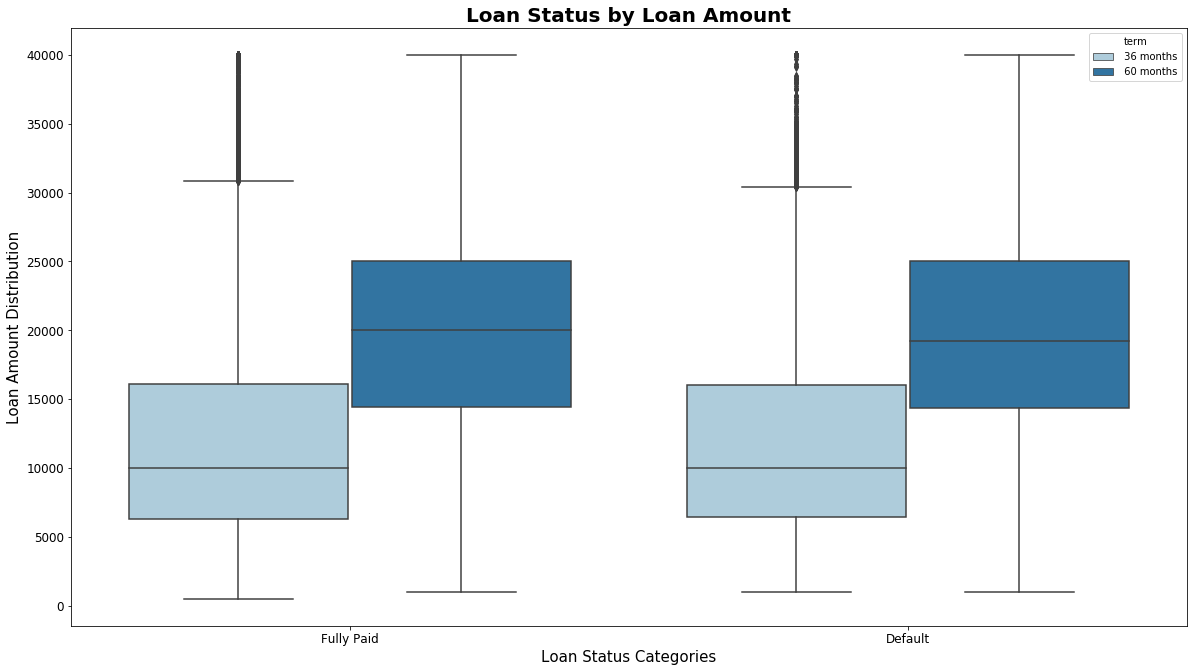

In [18]:
plt.figure(figsize = (20,11))
sns.boxplot(df_2.loan_status, df_2.loan_amnt, hue = df_2.term, palette = 'Paired')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Loan Status Categories", fontsize = 15)
plt.ylabel("Loan Amount Distribution", fontsize = 15)
plt.title("Loan Status by Loan Amount", fontsize = 20, weight='bold')

A nice thing to note here is that either *default loan* and *fully paid loan* has relatively the same loan amount (for both loan's terms). Except for fully paid loan with 60 months terms, the amount average is slightly higher compared to the default loan's average number. This means that the amount of loan alone can't necessarily predict the category of the loan.

Text(0.5, 1.0, 'Loan Status by Interest Rate')

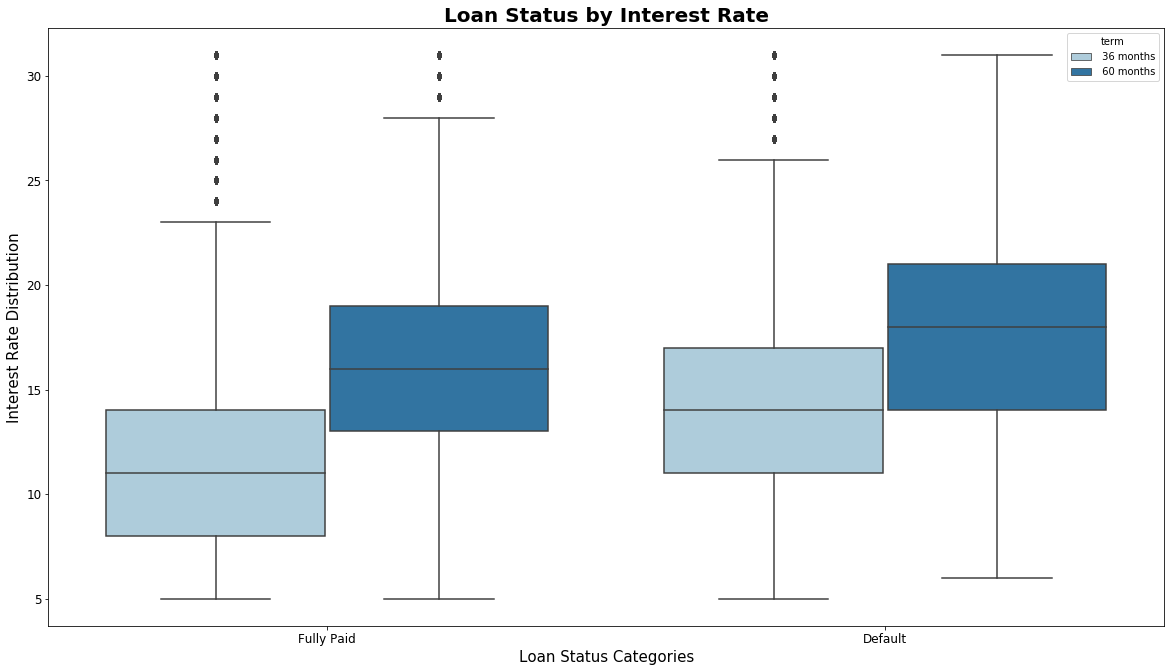

In [19]:
plt.figure(figsize = (20,11))
sns.boxplot(df_2.loan_status, round(df_2.int_rate, 0).astype(int), hue = df_2.term, palette = 'Paired')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Loan Status Categories", fontsize = 15)
plt.ylabel("Interest Rate Distribution", fontsize = 15)
plt.title("Loan Status by Interest Rate", fontsize = 20, weight='bold')

The graphic above shows that *default loan* has relatively higher interest rate compared to *fully paid loan*. This means that with higher interest rate, borrowers are more unlikely to repay their debt, and this is totally reasonable.

**3.8. Verification Status**

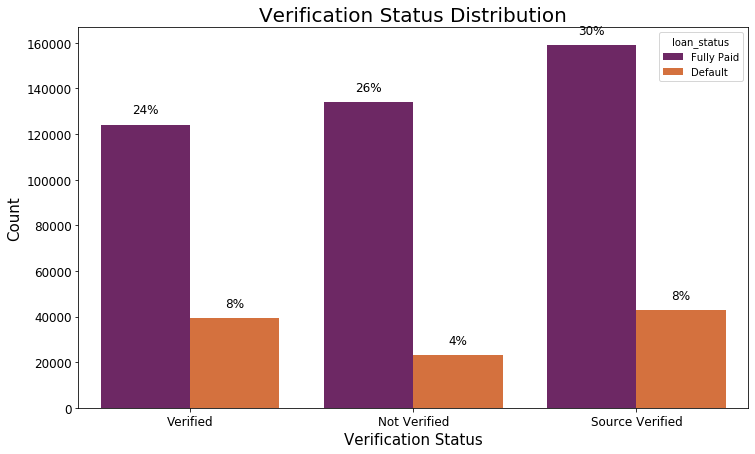

In [20]:
plt.figure(figsize=(12, 7))
plot5 = sns.countplot(df_2.verification_status, hue = df_2.loan_status, palette = 'inferno')
plt.title("Verification Status Distribution", fontsize = 20)
plt.xlabel("Verification Status", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

total = len(df_2)
sizes = []
for p in plot5.patches:
    height = p.get_height()
    sizes.append(height)
    plot5.text(p.get_x() + p.get_width()/2.,
            height + 5000,
            '{:1.0f}%'.format(height/total*100),
            ha = "center", 
            fontsize = 12)

By comparing the height of the bar of fully paid and default loan for each verification status, we can imply that **'verified'** status has the hige percentage of default loan (almost 8%). Somehow, this doesn't make sense in the first place. This might create a misleading conclusion that '*verification status'* might not be the best consideration to predict the loan's quality.

**3.9. Top 20 Job Titles for Each Grades**

In [21]:
most_emp_title = df_2.emp_title.value_counts()[:20].index.values  # get the top 20 most frequent employee job title
cm = sns.light_palette("orange", as_cmap=True)

round(pd.crosstab(df_2[df_2['emp_title'].isin(most_emp_title)]['emp_title'], 
                  df_2[df_2['emp_title'].isin(most_emp_title)]['grade'], 
                  normalize='index') * 100,2).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
emp_title,,,,,,,
Director,26.460000,29.150000,24.130000,12.350000,5.580000,1.810000,0.520000
Driver,12.830000,27.400000,29.940000,18.340000,8.220000,2.430000,0.850000
Engineer,22.860000,28.350000,26.420000,13.030000,6.210000,2.410000,0.720000
General Manager,17.360000,30.110000,28.520000,14.390000,6.960000,2.100000,0.560000
Manager,17.250000,28.390000,29.460000,14.610000,6.960000,2.360000,0.970000
Office Manager,16.660000,28.720000,29.910000,15.830000,6.120000,2.300000,0.460000
Operations Manager,16.730000,28.250000,30.780000,14.570000,6.770000,2.230000,0.670000
Owner,20.890000,29.150000,27.120000,14.230000,6.070000,1.780000,0.770000
President,27.390000,29.410000,24.940000,11.210000,5.420000,1.070000,0.570000


The crosstab functions builds a cross-tabulation table that can show the frequency with which certain groups of data appear.
From the visualization above, we can see that for loans with grade **'A'**, the most frequent borrowers are employee with job titles = ('Director', 'Engineer', 'President', 'Vice President') and other high-paying job titles. This means that these job titles have a lower risk of defaulting so that their loans is graded higher, which is reasonable. 

### 4.) Machine Learning

#### 4.A) First Trial

For the first trial, I'm gonna select data with only potentially related features. To filter the dataframe with this method, one has to really understand the business knowledge behind the data very well. 

The fewer number of column is, means that the model running time will also be faster. 

In [22]:
df_3 = df_2[[
    'loan_status', 'loan_amnt','term','int_rate','emp_length','grade', 'annual_inc',
    'home_ownership','dti'  # These features are just initial guess, you can try to choose any other combination
]]
df_3.head()

,loan_status,loan_amnt,term,int_rate,emp_length,grade,annual_inc,home_ownership,dti
1832766,Fully Paid,35000,36 months,12.12,5 years,B,165000.00,RENT,9.01
560750,Fully Paid,5000,36 months,8.99,10+ years,B,29000.00,RENT,8.61
616767,Fully Paid,23000,36 months,7.89,10+ years,A,75000.00,MORTGAGE,13.78
757688,Fully Paid,12000,36 months,6.97,1 year,A,110000.00,MORTGAGE,28.21
1936444,Fully Paid,15000,36 months,7.69,10+ years,A,65000.00,OWN,23.38


In [23]:
# Find missing values in the chosen columns
df_null = pd.DataFrame({'Count': df_3.isnull().sum(), 'Percent': round(100*df_3.isnull().sum()/len(df_3),2)})
df_null[df_null['Count'] != 0] 

,Count,Percent
emp_length,30242,5.80
dti,123,0.02


In [24]:
# Dropping rows with null values
df_clean = df_3.dropna(axis = 0)

In [25]:
print('Number of dropped rows: {} rows'.format(len(df_3)-len(df_clean)))

Number of dropped rows: 30248 rows


In [79]:
print(df_3.groupby('loan_status').groups)

{'Default': Int64Index([ 631901,  452092, 2105663,  481049, 1415506, 1104791, 1822986,
             479708, 1418990, 1156517,
            ...
            2043571, 1381503,  558080, 1336971,  790503, 2183536, 2227054,
            1185286,  545593,  705681],
           dtype='int64', length=105035), 'Fully Paid': Int64Index([1832766,  560750,  616767,  757688, 1936444, 1347326, 1784413,
            2077645, 1890516, 1883798,
            ...
             977716, 1966034, 1009059, 1813890, 1786469, 2070984, 1759435,
            2088618,  668419, 1724503],
           dtype='int64', length=416728)}


In [26]:
# The next step is to transform categorical target variable into integer
df_clean.loan_status = df_clean.loan_status.replace({'Fully Paid' : 1})
df_clean.loan_status = df_clean.loan_status.replace({'Default' : 0})
df_clean.loan_status.unique()

array([1, 0], dtype=int64)

We also have to transform categorical feature columns using *one hot encoding*

In [27]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df_clean['term'] = label.fit_transform(df_clean['term'])
df_clean['grade'] = label.fit_transform(df_clean['grade'])
df_clean['emp_length'] = label.fit_transform(df_clean['emp_length'])
df_clean['home_ownership'] = label.fit_transform(df_clean['home_ownership'])
df_clean.head()


,loan_status,loan_amnt,term,int_rate,emp_length,grade,annual_inc,home_ownership,dti
1832766,1,35000,0,12.12,5,1,165000.00,5,9.01
560750,1,5000,0,8.99,1,1,29000.00,5,8.61
616767,1,23000,0,7.89,1,0,75000.00,1,13.78
757688,1,12000,0,6.97,0,0,110000.00,1,28.21
1936444,1,15000,0,7.69,1,0,65000.00,4,23.38


Split data into target column (x) and features (y)

In [28]:
x = df_clean.drop(['loan_status'], axis=1)
y = df_clean['loan_status']
x.head()

,loan_amnt,term,int_rate,emp_length,grade,annual_inc,home_ownership,dti
1832766,35000,0,12.12,5,1,165000.00,5,9.01
560750,5000,0,8.99,1,1,29000.00,5,8.61
616767,23000,0,7.89,1,0,75000.00,1,13.78
757688,12000,0,6.97,0,0,110000.00,1,28.21
1936444,15000,0,7.69,1,0,65000.00,4,23.38


In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np 

coltrans = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'), [1,3,4,6])],      # 0,3,5 refers to the column indexes that need to be transformed      
    remainder = 'passthrough'                               
)                                                         

X = np.array(coltrans.fit_transform(x))


In [30]:
x.shape


(491515, 8)

The next step is, splitting data into training and testing data

In [31]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(
    x,
    y,
    test_size = 0.3
)

In [32]:
print(ytr.value_counts())
print(yts.value_counts())

1    276499
0     67561
Name: loan_status, dtype: int64
1    118223
0     29232
Name: loan_status, dtype: int64


If we look to the loan status distribution above, it is clearly noted that the data set is unbalanced, where the amount of *default* loan is far fewer than than the *fully paid* one.

An imbalanced data can result in inaccurate / biased classifications of the final output. Therefore, before fitting the data into the machine learning model, we need to rebalance the data with a method called SMOTE (Synthetic Minority Oversampling Technique).

In [33]:



from imblearn.over_sampling import SMOTE

smt = SMOTE()
xtr_2, ytr_2 = smt.fit_sample(xtr, ytr)

In [34]:
import numpy as np
np.bincount(ytr_2)

array([276499, 276499], dtype=int64)

Here we can see that after SMOTE function runs, the number of 'fully paid' and 'default' loan has been balanced.

**Fitting into Machine Learning Model**

Random Forest is the most common method used for classification algorithm. Although it has a high risk to overfit the data, but it has been a prominent method to solve cases with classification output.

In [35]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()

model = RandomForestClassifier()
model.fit(xtr_2, ytr_2)

stop = time.time()
duration = stop-start
print('The training took {:.2f} seconds.'.format(duration))

The training took 264.00 seconds.


In [36]:
print(round(model.score(xts, yts) * 100, 2), '%')

72.91 %


While the model gives a good accuracy score, it's better to see the **classification report** and **confusion matrix** to really see how good the model performance is in classifying both classes.

In [37]:
y_pred = model.predict(xts)

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(yts, y_pred)

array([[ 9665, 19567],
       [20385, 97838]], dtype=int64)

In [39]:
pd.crosstab(yts, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,9665,19567,29232
1,20385,97838,118223
All,30050,117405,147455


In [40]:
from sklearn.metrics import classification_report

target_names = ['Default', 'Fully Paid']
print(classification_report(yts, model.predict(xts), target_names=target_names))

              precision    recall  f1-score   support

     Default       0.32      0.33      0.33     29232
  Fully Paid       0.83      0.83      0.83    118223

    accuracy                           0.73    147455
   macro avg       0.58      0.58      0.58    147455
weighted avg       0.73      0.73      0.73    147455



From the confusion matrix and classification report above, we can really see that the model is biased toward *fully paid*. It runs pretty good at predicting *fully paid*, but it performs really bad at predicting the *default* (from all 36k actual default loans, the model predicted only less than half of them right --> 11k)

#### 4.B.) Second Trial

In this second trial, I want to try fitting the ML model using the unbalanced dataset (without applying SMOTE) to see if it really impactful to the final performance of the model. Using the same steps from the first trial...

In [41]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()

model2 = RandomForestClassifier()
model2.fit(xtr, ytr)

stop = time.time()
duration = stop-start
print('The training took {:.2f} seconds.'.format(duration))

The training took 123.72 seconds.


In [42]:
print(round(model2.score(xts, yts) * 100, 2), '%')

79.57 %


In [43]:
y_pred2 = model2.predict(xts)

In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix(yts, y_pred2)

array([[  3245,  25987],
       [  4135, 114088]], dtype=int64)

In [45]:
pd.crosstab(yts, y_pred2, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,3245,25987,29232
1,4135,114088,118223
All,7380,140075,147455


In [46]:
from sklearn.metrics import classification_report

target_names = ['Default', 'Fully Paid']
print(classification_report(yts, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

     Default       0.44      0.11      0.18     29232
  Fully Paid       0.81      0.97      0.88    118223

    accuracy                           0.80    147455
   macro avg       0.63      0.54      0.53    147455
weighted avg       0.74      0.80      0.74    147455



It seems that the accuracy score gives a slightly higher score compared to the first trial with balanced dataset. But, it also has to be noted that the model still shows a worse performance at predicting *default* (look at the decreasing classification report scores).

#### 4.C.) Third Trial

Another method to deal with unbalanced dataset is by applying NearMiss to perform undersampling in order to also get a balanced dataset.

In [47]:
from imblearn.under_sampling import NearMiss

nr = NearMiss()
xtr_3, ytr_3 = nr.fit_sample(xtr, ytr)

In [48]:
np.bincount(ytr_3)

array([67561, 67561], dtype=int64)

In [49]:


start = time.time()

model3 = RandomForestClassifier()
model3.fit(xtr_3, ytr_3)

stop = time.time()
duration = stop-start
print('The training took {:.2f} seconds.'.format(duration))

The training took 42.07 seconds.


In [50]:
print(round(model3.score(xts, yts) * 100, 2), '%')

50.42 %


In [51]:
y_pred3 = model3.predict(xts)

In [52]:
from sklearn.metrics import confusion_matrix

confusion_matrix(yts, y_pred3)

array([[20164,  9068],
       [64034, 54189]], dtype=int64)

In [53]:
pd.crosstab(yts, y_pred3, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,20164,9068,29232
1,64034,54189,118223
All,84198,63257,147455


In [54]:
from sklearn.metrics import classification_report

target_names = ['Default', 'Fully Paid']
print(classification_report(yts, y_pred3, target_names=target_names))

              precision    recall  f1-score   support

     Default       0.24      0.69      0.36     29232
  Fully Paid       0.86      0.46      0.60    118223

    accuracy                           0.50    147455
   macro avg       0.55      0.57      0.48    147455
weighted avg       0.73      0.50      0.55    147455



For the classification report generated from this first trial, it seems that undersampling method increase the performance of the ML model to predcit  default, but it decreases the performance to predict fully paid significantly. As a result, the whole accuracy score is just as bad.

So far, we haven't been able to increase the performance of the ML model.

#### 4.D.) Fourth Trial

Another way to increase ML model performance is by doing hyperparameter tuning, but this is not what I'm gonna do in this notebook.

Therefore, we could also re-consider the features we have filtered earlier. Beside using domain knowledge, it is also better to choose the features **objectively** by looking at the correlation for each features toward the target variable (loan_status).

Features can be in the form of number (float/integer) or string (object). For categorical features, we also have to one-hot-encode it first before fitting into the dataset. Choosing a categorical feature which have too many options will only causing the matrix becoming too large and difficult to handle by the computer.

In [55]:
# First, by knowing what are the features available in the dataframe
df_4 = df_2
df_4.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
1832766,35000,35000,34950.00,36 months,12.12,1164.51,B,B3,Protestant Church,5 years,RENT,165000.00,Verified,Sep-2012,Fully Paid,n,credit_card,Debt Be Gone,100xx,NY,9.01,0.00,Jan-1983,0.00,2.00,0.00,744,16.50,27.00,f,0.00,0.00,41922.27,41862.38,35000.00,6922.27,0.00,0.00,0.00,Sep-2015,1167.89,Dec-2018,0.00,1,Individual,0.00,0.00,41223.00,4500.00,0.00,20612.00,3756.00,16.50,0.00,0.00,360.00,238.00,30.00,30.00,2.00,30.00,12.00,0.00,1.00,1.00,1.00,8.00,14.00,1.00,10.00,1.00,2.00,0.00,0.00,0.00,0.00,96.00,0.00,0.00,0.00,49161.00,41223.00,4500.00,0.00,N,Cash,N
560750,5000,5000,5000.00,36 months,8.99,158.98,B,B1,Musician,10+ years,RENT,29000.00,Not Verified,Jul-2016,Fully Paid,n,debt_consolidation,Debt consolidation,372xx,TN,8.61,0.00,May-1989,0.00,5.00,1.00,2543,32.60,28.00,f,0.00,0.00,5426.52,5426.52,5000.00,426.52,0.00,0.00,0.00,Sep-2017,3523.75,Feb-2019,0.00,1,Individual,0.00,0.00,7050.00,7800.00,2.00,1410.00,2757.00,48.00,0.00,0.00,119.00,326.00,14.00,14.00,1.00,32.00,0.00,0.00,2.00,2.00,2.00,14.00,6.00,4.00,21.00,2.00,5.00,0.00,0.00,0.00,0.00,100.00,0.00,1.00,0.00,14760.00,7050.00,5300.00,6960.00,N,Cash,N
616767,23000,23000,23000.00,36 months,7.89,719.57,A,A5,Mail Handler,10+ years,MORTGAGE,75000.00,Verified,Jun-2016,Fully Paid,n,debt_consolidation,Debt consolidation,496xx,MI,13.78,0.00,Feb-1992,0.00,10.00,1.00,13773,44.90,36.00,w,0.00,0.00,23015.79,23015.79,23000.00,15.79,0.00,0.00,0.00,Jun-2016,23025.87,May-2016,0.00,1,Individual,0.00,0.00,125287.00,30700.00,4.00,15661.00,4135.00,64.00,0.00,0.00,132.00,291.00,26.00,8.00,7.00,64.00,8.00,0.00,1.00,3.00,1.00,6.00,15.00,7.00,14.00,3.00,8.00,0.00,0.00,0.00,2.00,100.00,0.00,1.00,0.00,152147.00,37604.00,11500.00,27444.00,N,Cash,N
757688,12000,12000,12000.00,36 months,6.97,370.37,A,A3,Chief Financial Officer,1 year,MORTGAGE,110000.00,Not Verified,Mar-2016,Fully Paid,n,credit_card,Credit card refinancing,460xx,IN,28.21,1.00,Nov-1981,1.00,14.00,0.00,26726,48.20,23.00,w,0.00,0.00,13321.26,13321.26,12000.00,1321.26,0.00,0.00,0.00,Dec-2018,1474.07,Feb-2019,0.00,1,Individual,0.00,0.00,406185.00,55400.00,1.00,31245.00,28674.00,48.20,0.00,0.00,157.00,411.00,46.00,23.00,2.00,46.00,1.00,0.00,5.00,5.00,6.00,7.00,8.00,6.00,11.00,5.00,14.00,0.00,0.00,0.00,0.00,91.30,16.70,0.00,0.00,527519.00,104266.00,55400.00,72000.00,N,Cash,N
1936444,15000,15000,15000.00,36 months,7.69,467.91,A,A4,Human Resources Consultant,10+ years,OWN,65000.00,Not Verified,Oct-2014,Fully Paid,n,debt_consolidation,Debt consolidation,130xx,NY,23.38,1.00,Oct-1998,1.00,16.00,2.00,18555,50.30,34.00,f,0.00,0.00,16006.15,16006.15,15000.00,1006.15,0.00,0.00,0.00,Oct-2015,10859.14,Aug-2018,0.00,1,Individual,0.00,0.00,96019.00,36900.00,7.00,6001.00,4679.00,75.90,0.00,0.00,131.00,191.00,1.00,1.00,3.00,8.00,1

In [82]:
df_4.groupby('loan_status').groups
df_4.shape

(521763, 80)

In [56]:
# The next step is to transform categorical target variable into integer
df_4.loan_status = df_4.loan_status.replace({'Fully Paid' : 1})
df_4.loan_status = df_4.loan_status.replace({'Default' : 0})

In [57]:
df_4.columns.to_series().groupby(df_clean.dtypes).groups

{dtype('int32'): Index(['term', 'grade', 'emp_length', 'home_ownership'], dtype='object'),
 dtype('int64'): Index(['loan_amnt', 'loan_status'], dtype='object'),
 dtype('float64'): Index(['int_rate', 'annual_inc', 'dti'], dtype='object')}

In [58]:
# First, dropping categorical features (object type) which have too many options available
df_4 = df_4.drop(['emp_title', 'sub_grade', 'issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'hardship_flag', 'debt_settlement_flag'], axis=1)

In [59]:
# Second, to filter numerical features, we can use .corr() function to select only features with high correlation to the target variable
df_4.corr()['loan_status']

loan_amnt                    -0.07
funded_amnt                  -0.07
funded_amnt_inv              -0.07
int_rate                     -0.26
installment                  -0.05
annual_inc                    0.04
loan_status                   1.00
dti                          -0.09
delinq_2yrs                  -0.02
inq_last_6mths               -0.06
open_acc                     -0.03
pub_rec                      -0.02
revol_bal                     0.02
revol_util                   -0.06
total_acc                     0.01
out_prncp                    -0.01
out_prncp_inv                -0.01
total_pymnt                   0.32
total_pymnt_inv               0.32
total_rec_prncp               0.44
total_rec_int                -0.06
total_rec_late_fee           -0.14
recoveries                   -0.50
collection_recovery_fee      -0.47
last_pymnt_amnt               0.35
collections_12_mths_ex_med   -0.02
policy_code                    nan
acc_now_delinq               -0.00
tot_coll_amt        

In [60]:
df_clean = df_4[[
    'loan_status', # target variable
    # features (object):
    'term', 'grade','home_ownership', 'verification_status', 'pymnt_plan',
    'purpose', 
    'initial_list_status', 
    'application_type', 'disbursement_method',
    # features (int/float):
    'total_pymnt', 
    'total_pymnt_inv', 
    'total_rec_prncp', 
    'recoveries',                   
    'collection_recovery_fee', 
    'last_pymnt_amnt', 
    'int_rate'
]]

In [61]:
df_null = pd.DataFrame({'Count': df_clean.isnull().sum(), 'Percent': round(100*df_clean.isnull().sum()/len(df_clean),2)})
df_null[df_null['Count'] != 0] 

,Count,Percent


It's good that there's no missing values

In [62]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df_clean['term'] = label.fit_transform(df_clean['term'])
df_clean['grade'] = label.fit_transform(df_clean['grade'])
# df_clean['emp_length'] = label.fit_transform(df_clean['emp_length'])
df_clean['home_ownership'] = label.fit_transform(df_clean['home_ownership'])
df_clean['verification_status'] = label.fit_transform(df_clean['verification_status'])
df_clean['pymnt_plan'] = label.fit_transform(df_clean['pymnt_plan'])
df_clean['purpose'] = label.fit_transform(df_clean['purpose'])
df_clean['initial_list_status'] = label.fit_transform(df_clean['initial_list_status'])
df_clean['application_type'] = label.fit_transform(df_clean['application_type'])
df_clean['disbursement_method'] = label.fit_transform(df_clean['disbursement_method'])

In [63]:
df_clean.head()

,loan_status,term,grade,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status,application_type,disbursement_method,total_pymnt,total_pymnt_inv,total_rec_prncp,recoveries,collection_recovery_fee,last_pymnt_amnt,int_rate
1832766,1,0,1,5,2,0,1,0,0,0,41922.27,41862.38,35000.00,0.00,0.00,1167.89,12.12
560750,1,0,1,5,0,0,2,0,0,0,5426.52,5426.52,5000.00,0.00,0.00,3523.75,8.99
616767,1,0,0,1,2,0,2,1,0,0,23015.79,23015.79,23000.00,0.00,0.00,23025.87,7.89
757688,1,0,0,1,0,0,1,1,0,0,13321.26,13321.26,12000.00,0.00,0.00,1474.07,6.97
1936444,1,0,0,4,0,0,2,0,0,0,16006.15,16006.15,15000.00,0.00,0.00,10859.14,7.69


In [83]:
df_clean.shape

(521763, 17)

In [64]:
x = df_clean.drop(['loan_status'], axis=1)
y = df_clean['loan_status']

In [65]:
x.head()

,term,grade,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status,application_type,disbursement_method,total_pymnt,total_pymnt_inv,total_rec_prncp,recoveries,collection_recovery_fee,last_pymnt_amnt,int_rate
1832766,0,1,5,2,0,1,0,0,0,41922.27,41862.38,35000.00,0.00,0.00,1167.89,12.12
560750,0,1,5,0,0,2,0,0,0,5426.52,5426.52,5000.00,0.00,0.00,3523.75,8.99
616767,0,0,1,2,0,2,1,0,0,23015.79,23015.79,23000.00,0.00,0.00,23025.87,7.89
757688,0,0,1,0,0,1,1,0,0,13321.26,13321.26,12000.00,0.00,0.00,1474.07,6.97
1936444,0,0,4,0,0,2,0,0,0,16006.15,16006.15,15000.00,0.00,0.00,10859.14,7.69


In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np 

coltrans = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0,1,2,3,4,5,6,7,8])],        
    remainder = 'passthrough'                               
)                                                         

x = np.array(coltrans.fit_transform(x))

In [84]:
print(x.shape)
print(y.shape)

(521763, 46)
(521763,)


In [67]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(x, y, test_size = 0.3)

In [68]:
from sklearn.ensemble import RandomForestClassifier
import time

start = time.time()

model = RandomForestClassifier()
model.fit(xtr, ytr)

stop = time.time()
duration = stop-start
print('The training took {:.2f} seconds.'.format(duration))

The training took 143.07 seconds.


In [69]:
print(round(model.score(xts, yts) * 100, 2), '%')

98.82 %


In [70]:
y_pred = model.predict(xts)

In [71]:
from sklearn.metrics import confusion_matrix

confusion_matrix(yts, y_pred)

array([[ 29713,   1639],
       [   214, 124963]], dtype=int64)

In [72]:
pd.crosstab(yts, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,29713,1639,31352
1,214,124963,125177
All,29927,126602,156529


In [73]:
from sklearn.metrics import classification_report

target_names = ['Default', 'Fully Paid']
print(classification_report(yts, model.predict(xts), target_names=target_names))

              precision    recall  f1-score   support

     Default       0.99      0.95      0.97     31352
  Fully Paid       0.99      1.00      0.99    125177

    accuracy                           0.99    156529
   macro avg       0.99      0.97      0.98    156529
weighted avg       0.99      0.99      0.99    156529



Finally, the fourth trial shows the best result from the ML model in predicting loan's classification. Beside generating a good accuracy score, the classification report also shows a magnificent result for both classification.

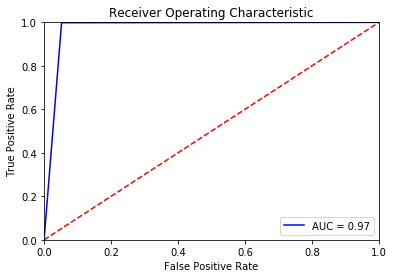

In [74]:
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(xts)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(yts, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plotting the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

It even shows a good AUC ROC score!

In [ ]:
import math

stopall = time.time()
durationall = stopall-startall
duration_mins = math.floor(durationall/60)
duration_secs = durationall - (duration_mins*60)

print('The whole notebook runs for {} minutes {:.2f} seconds.'.format(duration_mins, duration_secs))